In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

### Data loading

In [3]:
TRAIN_IMG_FOLDER = 'C:/Users/AMINAL/images/Training images/'
TEST_IMG_FOLDER = 'C:/Users/AMINAL/images/Test/'

train_set_files = os.listdir(TRAIN_IMG_FOLDER)
test_set_files = os.listdir(TEST_IMG_FOLDER)

width  = 128
height = 128

In [4]:
# Check:
# All data from 'train' is included in 'test'?
train_id_file = set([f.split('_')[0] for f in train_set_files])
test_id_file = set([f.split('_')[0] for f in train_set_files])
print(train_id_file <= test_id_file)

True


Train Images:


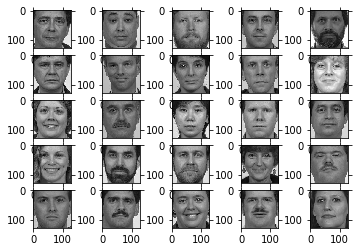

Test Images:


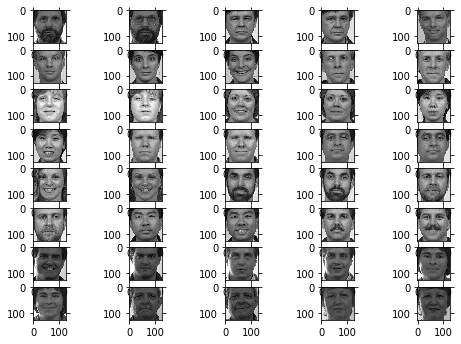

In [5]:
# Visualization:
print('Train Images:')
train_image_names = os.listdir(TRAIN_IMG_FOLDER)
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(TRAIN_IMG_FOLDER + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = os.listdir(TEST_IMG_FOLDER)#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(TEST_IMG_FOLDER + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Mean face 
Step 3 : Calculate the mean face


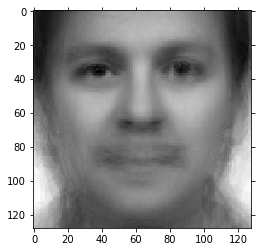

In [6]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalised faces
Step 4 : Calculation of difference between training vector and mean vector


In [7]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Display normalised faces

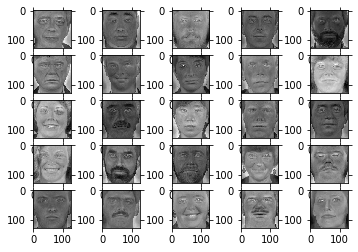

In [8]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Covariance matrix
Step 5

In [9]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,25.0)
print('Covariance matrix shape:', cov_matrix.shape)
#print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix shape: (25, 25)


### Step 6 : Eigenvector of covariance

In [10]:
#eigenvalues and eigenvectors
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('eigenvalues.shape: {} eigenvectors.shape: {}'.format(eigenvalues.shape, eigenvectors.shape))

eigenvalues.shape: (25,) eigenvectors.shape: (25, 25)


In [11]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [12]:
sorted_ind = sorted(range(eigenvalues.shape[0]), key=lambda k: eigenvalues[k], reverse=True)

eigvalues_sort = eigenvalues[sorted_ind]
eigvectors_sort = eigenvectors[sorted_ind]
train_set_files_sort = np.array(train_set_files)[sorted_ind]

### Find cumulative variance of each principle component

Cumulative proportion of variance explained vector: 
[0.28481989 0.41576165 0.49714907 0.55777059 0.60785024 0.65427472
 0.69489721 0.73168527 0.7641529  0.7916646  0.81546473 0.83669985
 0.85752859 0.87642433 0.89418977 0.91069532 0.92659352 0.94017913
 0.95309028 0.96500642 0.97612862 0.98491526 0.99275274 1.
 1.        ]


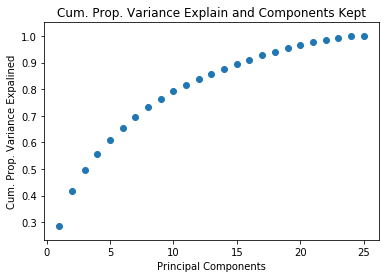

In [13]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

### Choose the necessary of principal components:

In [14]:
reduced_data = np.array(eigvectors_sort[:24]).transpose()
reduced_data.shape

(25, 24)

In [15]:
print(training_tensor.transpose().shape, reduced_data.shape)

(16384, 25) (25, 24)


In [16]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(24, 16384)

### Plot eigen faces

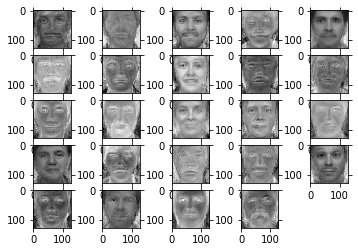

In [17]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Finding weights for each traning image

In [18]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
print(w.shape)

(25, 24)


### Reconizing all test images

In [19]:
def recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=False):

    count        = 0
    num_images   = 0
    correct_pred = 0
    
    result = []
    wts = []
    
    #False match rate (FMR)
    FMR_count = 0
    
    #False non-match rate (FNMR)
    FNMR_count = 0
     

    test_image_names2 = sorted(test_image_names)

    for img in test_image_names2:

        unknown_face = plt.imread(TEST_IMG_FOLDER+img)
        num_images += 1
        
        unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
        normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)
        
        wts.append([count, norms[index]])

        if prn: print('Input:'+'.'.join(img.split('.')[:2]), end='\t')
        count+=1
        
        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        if norms[index] < t0: # It's a face
            if match:
                if prn: print('Matched:' + train_image_names[index], end = '\t')
                correct_pred += 1
                result.append(1)
            else:
                if prn: print('F/Matched:'+train_image_names[index], end = '\t')
                result.append(0)
                FMR_count += 1
        else:
            if match:
                if prn: print('Unknown face!'+train_image_names[index], end = '\t')
                FNMR_count +=1
                
            else:
                pass
                correct_pred += 1



        if prn: print(norms[index], end=' ')
        if prn: print()
            
            
    
    FMR = FMR_count/num_images
    FNMR = FNMR_count/num_images
    
    
    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred/num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))
    
    
    
    return wts, result, correct_pred, num_images, FMR, FNMR
    

wts, result, correct_pred, num_images, FMR, FNMR =recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=True)

Input:26.jpg	F/Matched:13.jpg	0.0 
Input:27.jpg	F/Matched:2.jpg	40431280.529218346 
Input:28.jpg	F/Matched:14.jpg	0.0 
Input:29.jpg	F/Matched:14.jpg	12052161.293856984 
Input:30.jpg	F/Matched:15.jpg	0.0 
Input:31.jpg	F/Matched:10.jpg	21111282.15971107 
Input:32.jpg	F/Matched:16.jpg	0.0 
Input:33.jpg	F/Matched:16.jpg	21371245.77781545 
Input:34.jpg	F/Matched:17.jpg	0.0 
Input:35.jpg	F/Matched:17.jpg	9228410.181060039 
Input:36.jpg	F/Matched:18.jpg	0.0 
Input:37.jpg	F/Matched:18.jpg	38762786.49756965 
Input:38.jpg	F/Matched:19.jpg	0.0 
Input:39.jpg	F/Matched:23.jpg	14035103.82791078 
Input:40.jpg	F/Matched:20.jpg	0.0 
Input:41.jpg	F/Matched:2.jpg	32307115.167188454 
Input:42.jpg	F/Matched:21.jpg	0.0 
Input:43.jpg	F/Matched:17.jpg	13598710.414367666 
Input:44.jpg	F/Matched:22.jpg	0.0 
Input:45.jpg	F/Matched:22.jpg	22737700.290245578 
Input:46.jpg	F/Matched:23.jpg	0.0 
Input:47.jpg	F/Matched:23.jpg	23658602.604276564 
Input:48.jpg	F/Matched:24.jpg	0.0 
Input:49.jpg	F/Matched:24.jpg	2270704

#### Visualisation result of prediction
with high error threshold: t0 = 2e8

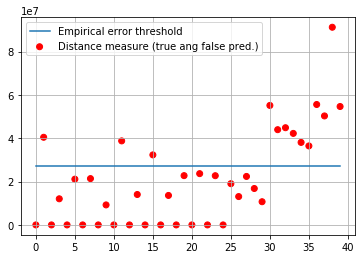

In [20]:
def rg(r):
    if r: return 'g'
    else: return 'r'
cl = [rg(r) for r in result]

x=[x[0] for x in wts]
y=[y[1] for y in wts]
plt.scatter(x,y, color=cl, label = 'Distance measure (true ang false pred.)')

x2=[x[0] for x in wts]
y2=[2.7e7 for y in wts]

plt.plot(x2,y2, label = 'Empirical error threshold')
plt.legend()
plt.grid()

plt.show()

### Consider the results of predictions with different error thresholds

In [21]:
CPR_list, t0_list, FMR_list, FNMR_list = [], [] , [] , []
for t0 in np.linspace(start=0, stop=1e8, num=20):
    print('{:e}'.format(t0), end=' ')
    wts, result, correct_pred, num_images, FMR, FNMR = recogniser(test_image_names, train_image_names,proj_data,w, t0)
    
    CPR_list.append(correct_pred/num_images) 
    t0_list.append(t0)
    FMR_list.append(FMR)
    FNMR_list.append(FNMR)
    

0.000000e+00 Correct predictions: 40/40 = 1.0 		 FMR: 0.0 	 FNMR: 0.0 	
5.263158e+06 Correct predictions: 27/40 = 0.675 		 FMR: 0.325 	 FNMR: 0.0 	
1.052632e+07 Correct predictions: 26/40 = 0.65 		 FMR: 0.35 	 FNMR: 0.0 	
1.578947e+07 Correct predictions: 21/40 = 0.525 		 FMR: 0.475 	 FNMR: 0.0 	
2.105263e+07 Correct predictions: 19/40 = 0.475 		 FMR: 0.525 	 FNMR: 0.0 	
2.631579e+07 Correct predictions: 13/40 = 0.325 		 FMR: 0.675 	 FNMR: 0.0 	
3.157895e+07 Correct predictions: 13/40 = 0.325 		 FMR: 0.675 	 FNMR: 0.0 	
3.684211e+07 Correct predictions: 11/40 = 0.275 		 FMR: 0.725 	 FNMR: 0.0 	
4.210526e+07 Correct predictions: 8/40 = 0.2 		 FMR: 0.8 	 FNMR: 0.0 	
4.736842e+07 Correct predictions: 5/40 = 0.125 		 FMR: 0.875 	 FNMR: 0.0 	
5.263158e+07 Correct predictions: 4/40 = 0.1 		 FMR: 0.9 	 FNMR: 0.0 	
5.789474e+07 Correct predictions: 1/40 = 0.025 		 FMR: 0.975 	 FNMR: 0.0 	
6.315789e+07 Correct predictions: 1/40 = 0.025 		 FMR: 0.975 	 FNMR: 0.0 	
6.842105e+07 Correct prediction

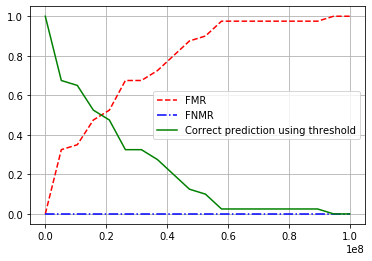

In [22]:
x1=t0_list
y1=FMR_list

x2=t0_list
y2=FNMR_list

x3=t0_list
y3=CPR_list

plt.plot(x1,y1, ls='--', color='r', label='FMR',)
plt.plot(x2,y2, ls='-.', color='b', label='FNMR')
plt.plot(x3,y3, color='g', label='Correct prediction using threshold')

plt.grid()
plt.legend()

## Visualization of prediction result on all test images

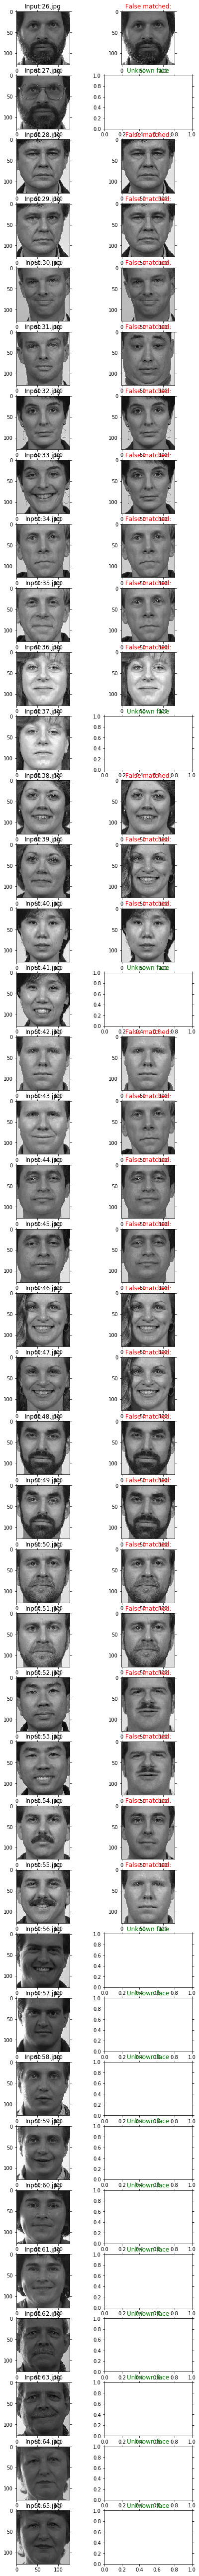

In [23]:
count        = 0
num_images   = 0
correct_pred = 0
def Visualization(img, train_image_names,proj_data,w, t0):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(TEST_IMG_FOLDER+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(40,2,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
   

    
    plt.subplot(40,2,1+count)
    if norms[index] < t0: # It's a face
            
        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        #if img.split('.')[0] == train_image_names[index].split('.')[0]:
        if match:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.title('Matched:', color='g')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')
                
            correct_pred += 1
        else:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.title('False matched:', color='r')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')
    else:
        #if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
        if img.split('_')[0] not in [i.split('_')[0] for i in train_image_names]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')
                
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
   
    count+=1

    
fig = plt.figure(figsize=(5, 30))

test_image_names2 = sorted(test_image_names)
for i in range(len(test_image_names2)):
    Visualization(test_image_names2[i], train_image_names,proj_data,w, t0=2.7e7)

plt.show()

